In [ ]:
import pandas as pd
articles = '/content/drive/MyDrive/DA_Programmers/프로젝트/articles.csv'
customers = '/content/drive/MyDrive/DA_Programmers/프로젝트/customers.csv'
transactions = '/content/drive/MyDrive/DA_Programmers/프로젝트/transactions_train.csv'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns

**환경1: 지속 가능한 패션 제품(예: 친환경 소재로 제작된 상품)의 구매 빈도는 시간이 지남에 따라 증가하고 있다.**

In [ ]:
# csv 읽기
# transactions 시간 오래 소요
articles_df = pd.read_csv(articles)
customers_df = pd.read_csv(customers)
transactions_df = pd.read_csv(transactions)

In [ ]:
# 데이터프레임으로 구성
articles_head = articles_df.head()
customers_head = customers_df.head()

articles_head, customers_head

# 친환경 제품 식별을 위해 'articles.csv' 데이터셋에서 특정 조건을 확인합니다.
# 예시: 'detail_desc' 열에 'Microfibre' 등의 단어가 포함된 경우
# sustainable_keywords = ['Microfibre', 'organic', 'cotton', 'recycled', 'wool','polyamide','lyocell','polyster']
sustainable_keywords = ['lyocell','recycled wool','linen','recycled polyester','recycled polyamide', 'recycled plastic','cotton','polyester',
                        'wood and man-made Cellulosic fiber',
                        'polyamide','leather','organic','microfibre']

# NaN 값을 빈 문자열로 대체
articles_df['detail_desc'] = articles_df['detail_desc'].fillna('')

# 'is_sustainable' 열 계산
articles_df['is_sustainable'] = articles_df['detail_desc'].apply(
    lambda x: any(keyword in x.lower() for keyword in sustainable_keywords)
)

# 'transactions_train.csv'와 'articles.csv'를 병합합니다.
merged_df = pd.merge(transactions_df, articles_df[['article_id', 'is_sustainable']], on='article_id')

# 날짜별로 친환경 제품의 구매 빈도를 계산합니다.
sustainable_purchases_over_time = merged_df[merged_df['is_sustainable']].groupby('t_dat')['article_id'].count()

# 결과 출력
sustainable_purchases_over_time.head()  # 처음 몇 개의 데이터를 출력하여 확인합니다.


t_dat
2018-09-20    11251
2018-09-21    10934
2018-09-22     4048
2018-09-23    11573
2018-09-24    10887
Name: article_id, dtype: int64

In [ ]:
# 't_dat' 열의 데이터 타입 확인
print(merged_df['t_dat'].dtype)

# 날짜 형식으로 변환 (필요한 경우)
merged_df['t_dat'] = pd.to_datetime(merged_df['t_dat'])

# 날짜별로 친환경 제품의 구매 빈도를 다시 계산합니다.
sustainable_purchases_over_time = merged_df[merged_df['is_sustainable']].groupby('t_dat')['article_id'].count()

# 결과 출력
sustainable_purchases_over_time.head()  # 처음 몇 개의 데이터를 출력하여 확인합니다.


object


t_dat
2018-09-20    11251
2018-09-21    10934
2018-09-22     4048
2018-09-23    11573
2018-09-24    10887
Name: article_id, dtype: int64

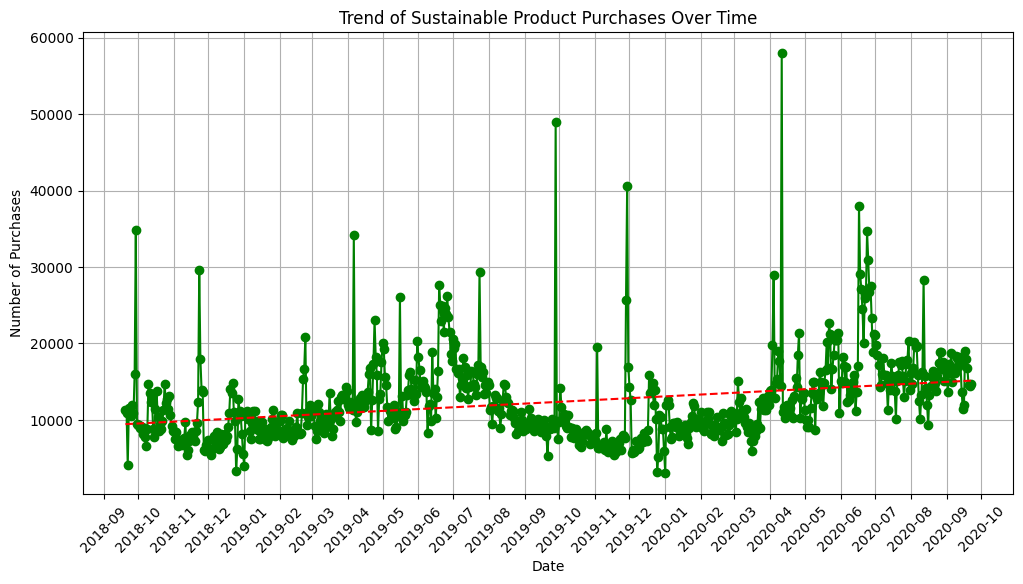

In [ ]:
# 시각화 설정
plt.figure(figsize=(12, 6))

# 데이터 플롯
plt.plot(sustainable_purchases_over_time.index, sustainable_purchases_over_time.values, marker='o', color='green')

# 타이틀 및 축 레이블 설정
plt.title('Trend of Sustainable Product Purchases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')

# x축 날짜 간격 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 축 라벨 회전
plt.xticks(rotation=45)

# 그리드 추가
plt.grid(True)

# 추세선 추가 (선택적)
z = np.polyfit(mdates.date2num(sustainable_purchases_over_time.index), sustainable_purchases_over_time.values, 1)
p = np.poly1d(z)
plt.plot(sustainable_purchases_over_time.index, p(mdates.date2num(sustainable_purchases_over_time.index)), "r--")

# 그래프 표시
plt.show()

**환경2: 특정 색상이나 디자인 패턴(예: 자연을 연상시키는 색상 및 패턴)을 가진 제품의 판매량이 일정한 수준을 유지하는 것으로 관찰될 수 있으며, 이는 환경에 대한 소비자의 지속적인 인식과 관심을 반영할 수 있다.**

In [ ]:
# 'graphical_appearance_name' 열의 고유값 확인
unique_graphical_appearances = articles_df['graphical_appearance_name'].unique()

unique_graphical_appearances

array(['Solid', 'Stripe', 'All over pattern', 'Melange', 'Transparent',
       'Metallic', 'Application/3D', 'Denim', 'Colour blocking', 'Dot',
       'Other structure', 'Contrast', 'Treatment', 'Check', 'Chambray',
       'Front print', 'Glittering/Metallic', 'Mixed solid/pattern',
       'Placement print', 'Other pattern', 'Neps', 'Embroidery', 'Lace',
       'Jacquard', 'Unknown', 'Argyle', 'Slub', 'Mesh', 'Sequin',
       'Hologram'], dtype=object)

In [ ]:
# 'perceived_colour_master_name' 열의 고유값 확인
unique_perceived_colour_master_name = articles_df['perceived_colour_master_name'].unique()

unique_perceived_colour_master_name

array(['Black', 'White', 'Beige', 'Grey', 'Blue', 'Pink', 'Lilac Purple',
       'Red', 'Mole', 'Orange', 'Metal', 'Brown', 'Turquoise', 'Yellow',
       'Khaki green', 'Green', 'undefined', 'Unknown', 'Yellowish Green',
       'Bluish Green'], dtype=object)

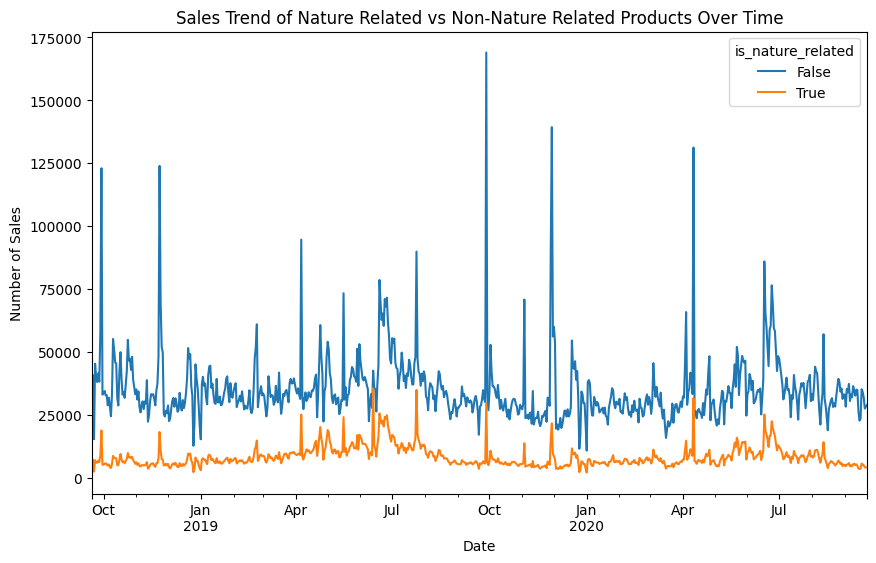

In [ ]:
# 자연을 연상시키는 색상 및 패턴 식별
# nature_related_keywords = ['All over pattern', 'Other pattern', 'Embroidery', 'Jacquard', 'slub','mesh']
nature_related_keywords = ['All over pattern', 'Jacquard', 'Embroidery', 'Lace']
articles_df['is_nature_related'] = (
    articles_df['perceived_colour_master_name'].str.contains('green', case=False) |
    articles_df['graphical_appearance_name'].str.contains('|'.join(nature_related_keywords), case=False)
)

# 데이터 병합
merged_df = pd.merge(transactions_df, articles_df[['article_id', 'is_nature_related']], on='article_id')

# 날짜 포맷 변경 및 시간에 따른 판매량 추이 분석
merged_df['t_dat'] = pd.to_datetime(merged_df['t_dat'])
sales_trend = merged_df.groupby(['t_dat', 'is_nature_related']).size().unstack().fillna(0)

# 결과 시각화
sales_trend.plot(kind='line', figsize=(10, 6))
plt.title('Sales Trend of Nature Related vs Non-Nature Related Products Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.show()

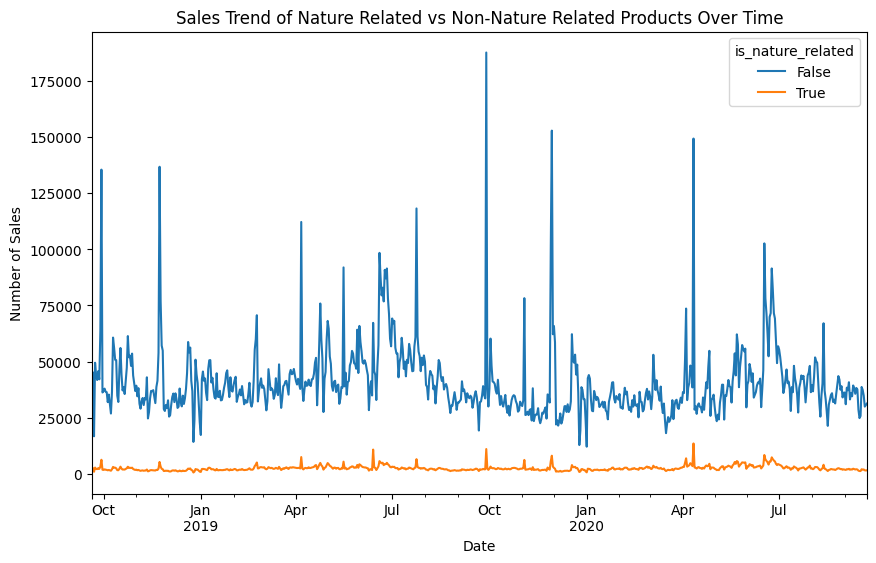

In [ ]:
# 자연을 연상시키는 색상 및 패턴 식별
# nature_related_keywords = ['All over pattern', 'Other pattern', 'Embroidery', 'Jacquard', 'slub','mesh']
articles_df['is_nature_related'] = articles_df['perceived_colour_master_name'].str.contains('green', case=False)

# 데이터 병합
merged_df = pd.merge(transactions_df, articles_df[['article_id', 'is_nature_related']], on='article_id')

# 날짜 포맷 변경 및 시간에 따른 판매량 추이 분석
merged_df['t_dat'] = pd.to_datetime(merged_df['t_dat'])
sales_trend = merged_df.groupby(['t_dat', 'is_nature_related']).size().unstack().fillna(0)

# 결과 시각화
sales_trend.plot(kind='line', figsize=(10, 6))
plt.title('Sales Trend of Nature Related vs Non-Nature Related Products Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.show()

**환경3: 고객들은 환경에 미치는 영향을 고려하여 구매 결정을 내리고 있으며, 이러한 경향은 특히 온라인 채널에서 두드러진다.**

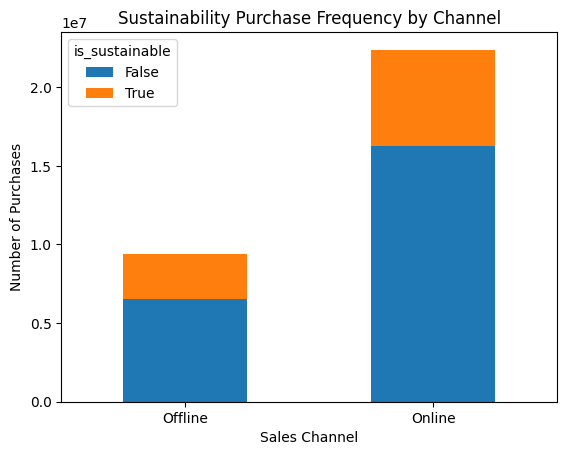

In [ ]:
# 환경 친화적인 제품 식별
sustainable_keywords = ['lyocell','recycled wool','linen','recycled polyester','recycled polyamide', 'recycled plastic','cotton','polyester',
                        'wood and man-made Cellulosic fiber',
                        'polyamide','leather','organic','microfibre']
articles_df['is_sustainable'] = articles_df['detail_desc'].apply(lambda x: any(keyword in str(x).lower() for keyword in sustainable_keywords))

# 데이터 병합
merged_df = pd.merge(transactions_df, articles_df[['article_id', 'is_sustainable']], on='article_id')

# 채널별 구매 빈도 분석
channel_sustainability = merged_df.groupby(['sales_channel_id', 'is_sustainable']).size().unstack()

# 결과 시각화
channel_sustainability.plot(kind='bar', stacked=True)
plt.title('Sustainability Purchase Frequency by Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Number of Purchases')
plt.xticks(ticks=[0, 1], labels=['Offline', 'Online'], rotation=0)
plt.show()

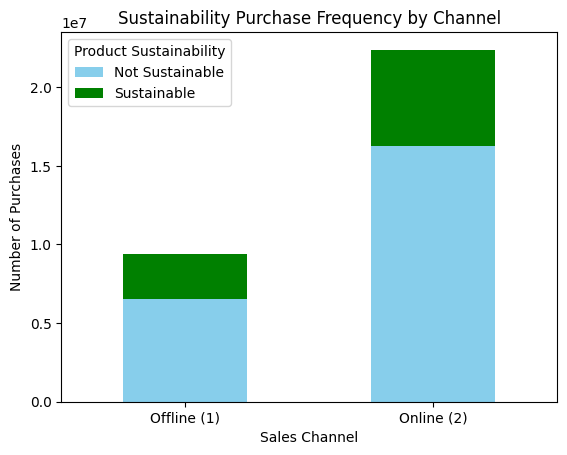

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 환경 친화적인 제품 식별
# List of keywords associated with sustainable products
sustainable_keywords = [
    'lyocell', 'recycled wool', 'linen', 'recycled polyester', 'recycled polyamide',
    'recycled plastic', 'cotton', 'polyester', 'wood and man-made cellulosic fiber',
    'polyamide', 'leather', 'organic', 'microfibre'
]

# Create a new column 'is_sustainable' to mark sustainable products
articles_df['is_sustainable'] = articles_df['detail_desc'].apply(
    lambda x: any(keyword in str(x).lower() for keyword in sustainable_keywords)
)

# 데이터 병합
# Merge transaction data with article data using 'article_id' while keeping 'is_sustainable' information
merged_df = pd.merge(transactions_df, articles_df[['article_id', 'is_sustainable']], on='article_id')

# 채널별 구매 빈도 분석
# Group data by 'sales_channel_id' and 'is_sustainable' to count occurrences
channel_sustainability = merged_df.groupby(['sales_channel_id', 'is_sustainable']).size().unstack(fill_value=0)

# 결과 시각화
# Plotting the data with a stacked bar chart to show the frequency of sustainable and non-sustainable product purchases by channel
channel_sustainability.plot(kind='bar', stacked=True, color=['skyblue', 'green'])
plt.title('Sustainability Purchase Frequency by Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Number of Purchases')
plt.xticks(ticks=[0, 1], labels=['Offline (1)', 'Online (2)'], rotation=0)
plt.legend(['Not Sustainable', 'Sustainable'], title='Product Sustainability')
plt.show()


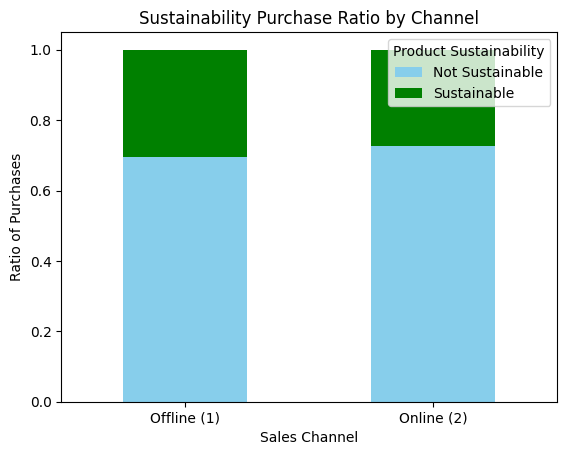

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 환경 친화적인 제품 식별
sustainable_keywords = [
    'lyocell', 'recycled wool', 'linen', 'recycled polyester', 'recycled polyamide',
    'recycled plastic', 'cotton', 'polyester', 'wood and man-made cellulosic fiber',
    'polyamide', 'leather', 'organic', 'microfibre'
]

# Create a new column 'is_sustainable' to mark sustainable products
articles_df['is_sustainable'] = articles_df['detail_desc'].apply(
    lambda x: any(keyword in str(x).lower() for keyword in sustainable_keywords)
)

# 데이터 병합
merged_df = pd.merge(transactions_df, articles_df[['article_id', 'is_sustainable']], on='article_id')

# 채널별 구매 빈도 분석 및 비율 계산
channel_sustainability_count = merged_df.groupby(['sales_channel_id', 'is_sustainable']).size().unstack(fill_value=0)
channel_sustainability_ratio = channel_sustainability_count.div(channel_sustainability_count.sum(axis=1), axis=0)

# 결과 시각화
channel_sustainability_ratio.plot(kind='bar', stacked=True, color=['skyblue', 'green'])
plt.title('Sustainability Purchase Ratio by Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Ratio of Purchases')
plt.xticks(ticks=[0, 1], labels=['Offline (1)', 'Online (2)'], rotation=0)
plt.legend(['Not Sustainable', 'Sustainable'], title='Product Sustainability')
plt.show()


**사회1: 패션 뉴스 구독자와 비구독자 간의 구매 행태에 차이가 있으며, 이는 소비자의 사회적 관여도와 패션에 대한 관심도를 나타낼 수 있다.**

고객의 참여도와 사회적 관심사에 따른 구매 행태 분석. 소비자의 커뮤니케이션 참여도 및 관심사는 기업의 사회적 책임과 밀접한 관련.

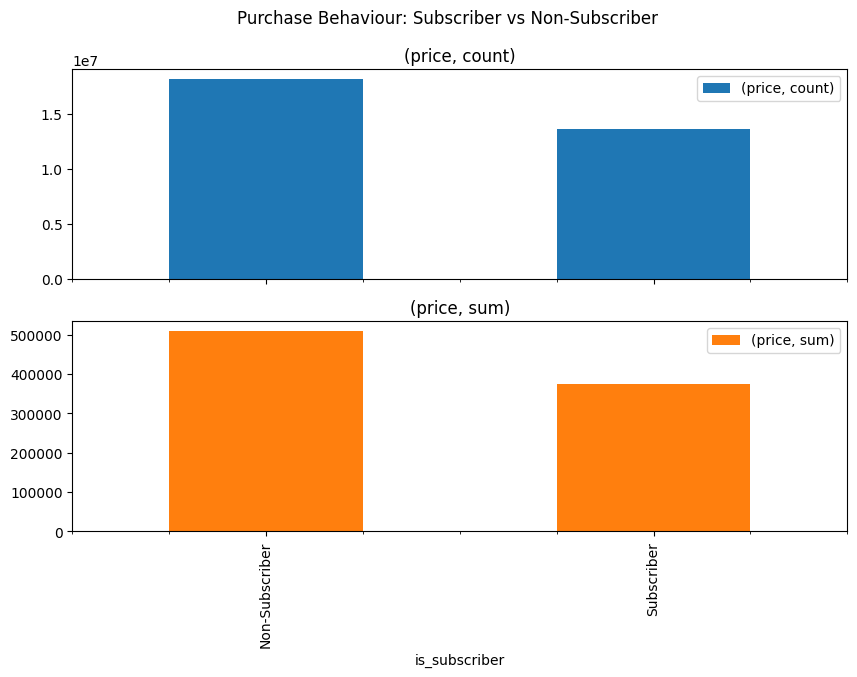

In [ ]:
# 데이터 병합
merged_df = pd.merge(transactions_df, customers_df[['customer_id', 'fashion_news_frequency']], on='customer_id')

# 구독 여부에 따라 데이터 분류
merged_df['is_subscriber'] = merged_df['fashion_news_frequency'].apply(lambda x: 'Subscriber' if x not in ['None', 'NONE', np.nan] else 'Non-Subscriber')

# 구독자와 비구독자의 구매 행태 분석 (예: 구매 빈도와 총액)
purchase_behaviour = merged_df.groupby('is_subscriber').agg({'price': ['count', 'sum']})

# 결과 시각화
purchase_behaviour.plot(kind='bar', subplots=True, figsize=(10, 6), layout=(2,1))
plt.suptitle('Purchase Behaviour: Subscriber vs Non-Subscriber')
plt.show()

**거버넌스1: 온라인과 오프라인 채널 간의 판매 비율에 차이가 있으며, 이는 회사의 옴니채널 전략과 고객 서비스 정책의 효과를 반영할 수 있다**

다양한 판매 채널을 효율적으로 운영하는 것은 비즈니스 모델의 거버넌스 구조를 평가하는 중요한 요소.

<Figure size 1500x700 with 0 Axes>

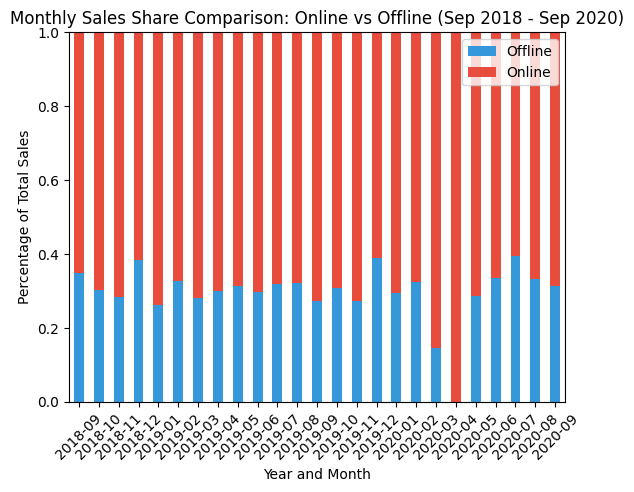

In [ ]:
# 'sales_channel_id'를 기준으로 온라인(2)과 오프라인(1) 판매량 분석
# 't_dat' 열을 날짜 형식으로 변환
transactions_df['t_dat'] = pd.to_datetime(transactions_df['t_dat'])

# 월별로 데이터 집계
transactions_df['year_month'] = transactions_df['t_dat'].dt.to_period('M')
channel_sales = transactions_df.groupby(['year_month', 'sales_channel_id']).size().unstack()

channel_sales_percentage = channel_sales.div(channel_sales.sum(axis=1), axis=0)

# 결과 시각화
plt.figure(figsize=(15, 7))
channel_sales_percentage.plot(kind='bar', stacked=True, color=['#3498db', '#e74c3c'])
plt.title('Monthly Sales Share Comparison: Online vs Offline (Sep 2018 - Sep 2020)')
plt.xlabel('Year and Month')
plt.ylabel('Percentage of Total Sales')
plt.xticks(rotation=45)
plt.legend(['Offline', 'Online'])
plt.ylim(0, 1)  # fixed y-axis to 100% to make all bars the same height
plt.show()

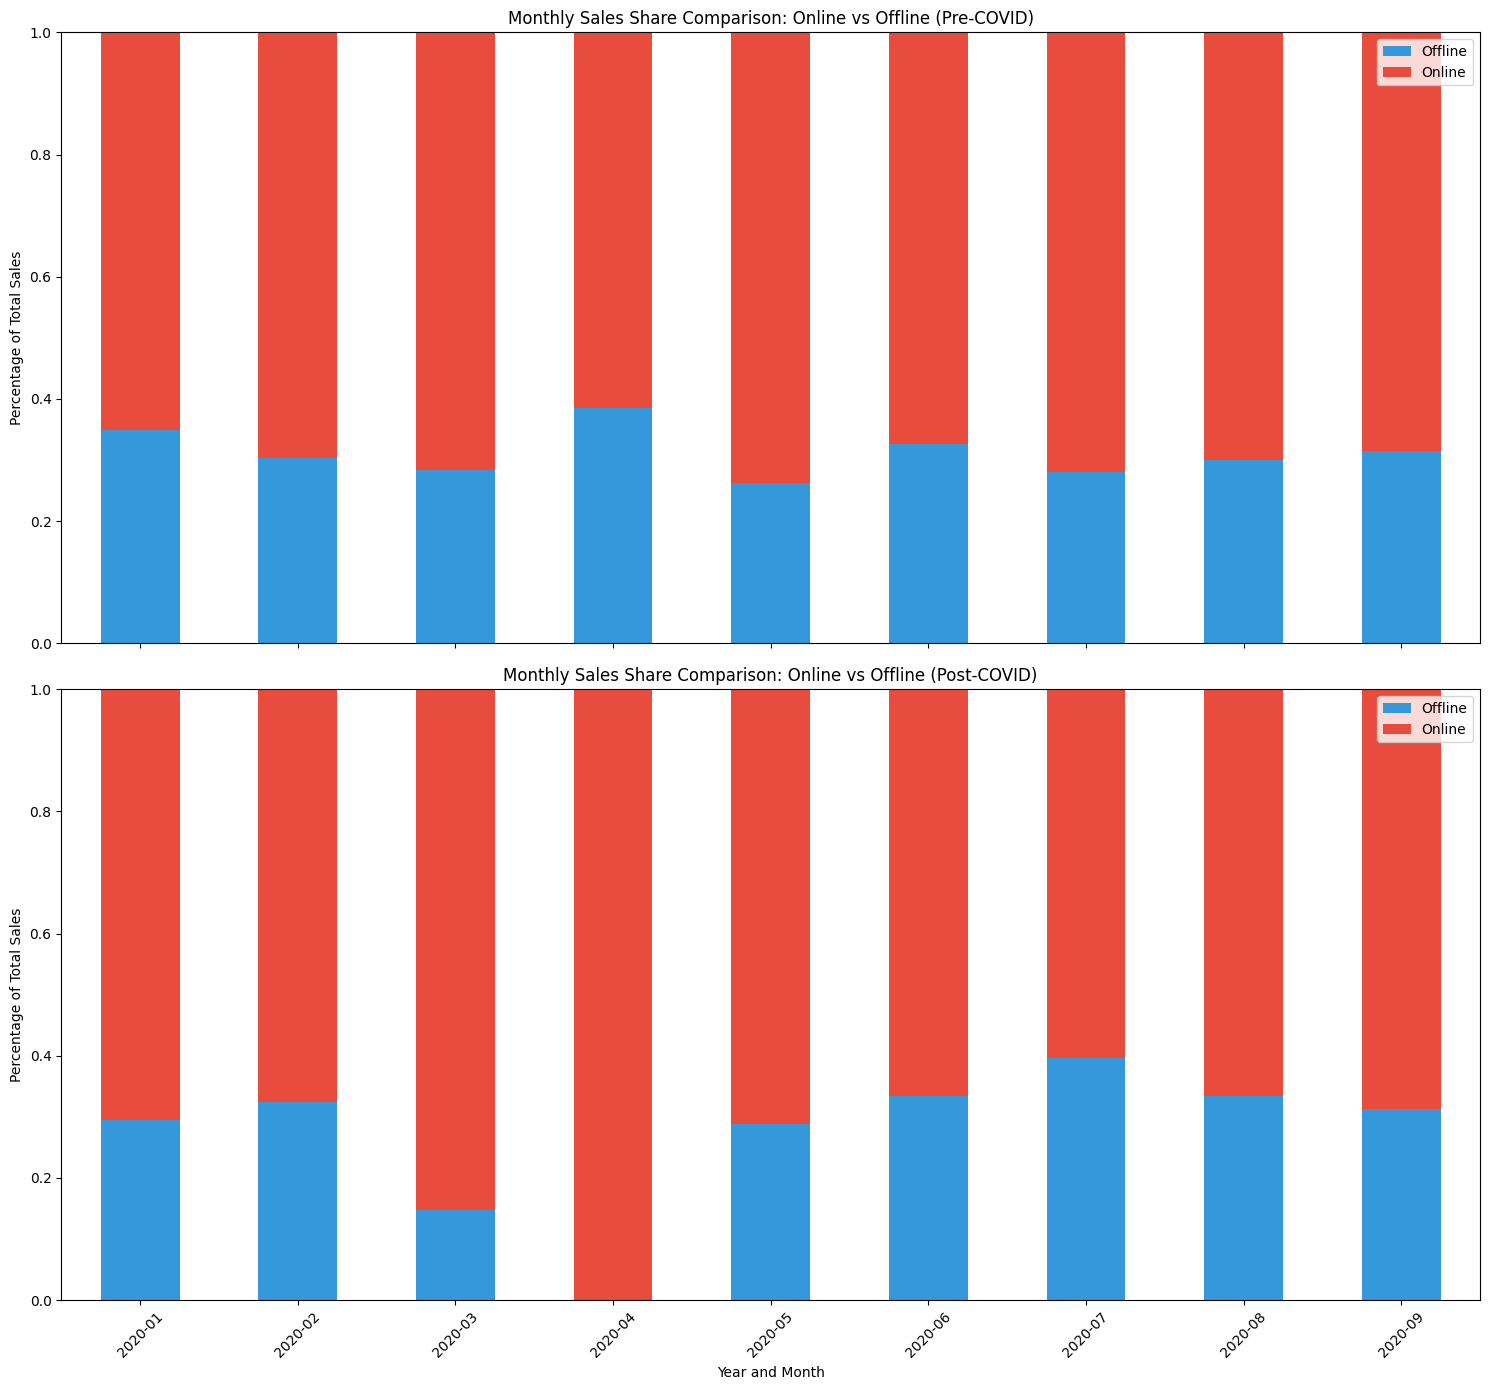

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame setup
# transactions_df = pd.read_csv('your_data.csv')  # Assuming you have a CSV file

# Ensuring 't_dat' column is converted properly to datetime format
transactions_df['t_dat'] = pd.to_datetime(transactions_df['t_dat'], errors='coerce')

# Checking if there are any NaT values which indicate conversion issues
if transactions_df['t_dat'].isnull().any():
    print("Warning: Some dates couldn't be converted and are set as NaT.")

# Adding 'year_month' column for grouping by month
transactions_df['year_month'] = transactions_df['t_dat'].dt.to_period('M')

# Grouping data by month and channel, and counting transactions
channel_sales = transactions_df.groupby(['year_month', 'sales_channel_id']).size().unstack()

# Calculating percentage of sales for each channel
channel_sales_percentage = channel_sales.div(channel_sales.sum(axis=1), axis=0)

# Splitting the data into pre-COVID and post-COVID
pre_covid_data = channel_sales_percentage[:'2019-12']
post_covid_data = channel_sales_percentage['2020-01':]

# Plotting the data
fig, ax = plt.subplots(2, 1, figsize=(15, 14), sharex=True)

# Pre-COVID Plot
pre_covid_data.plot(kind='bar', stacked=True, color=['#3498db', '#e74c3c'], ax=ax[0])
ax[0].set_title('Monthly Sales Share Comparison: Online vs Offline (Pre-COVID)')
ax[0].set_ylabel('Percentage of Total Sales')
ax[0].legend(['Offline', 'Online'])
ax[0].set_ylim(0, 1)  # Fixed y-axis to 100% to make all bars the same height

# Post-COVID Plot
post_covid_data.plot(kind='bar', stacked=True, color=['#3498db', '#e74c3c'], ax=ax[1])
ax[1].set_title('Monthly Sales Share Comparison: Online vs Offline (Post-COVID)')
ax[1].set_xlabel('Year and Month')
ax[1].set_ylabel('Percentage of Total Sales')
ax[1].set_xticks(range(len(post_covid_data.index)))
ax[1].set_xticklabels([p.strftime('%Y-%m') for p in post_covid_data.index], rotation=45)
ax[1].legend(['Offline', 'Online'])
ax[1].set_ylim(0, 1)  # Fixed y-axis to 100% to make all bars the same height

plt.tight_layout()
plt.show()


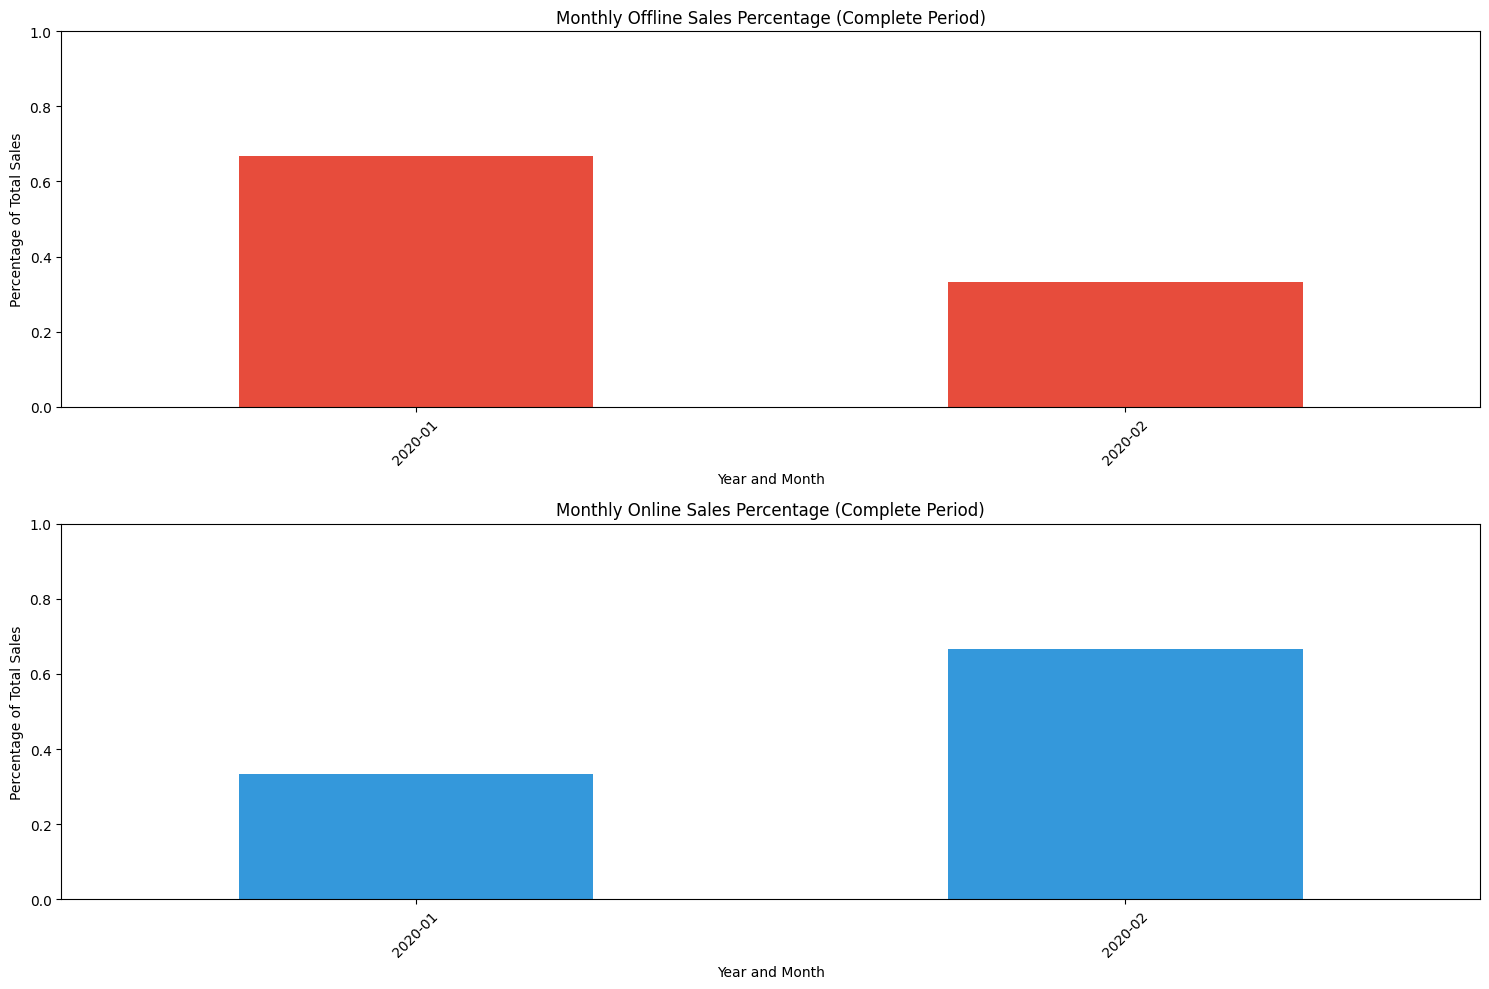

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data simulation (please use your actual 'transactions_df' DataFrame)
data = {'t_dat': ['2020-01-01', '2020-01-01', '2020-01-02', '2020-02-01', '2020-02-02', '2020-02-03'],
        'sales_channel_id': [1, 2, 1, 1, 2, 2]}
transactions_df = pd.DataFrame(data)

# Converting 't_dat' to datetime format
transactions_df['t_dat'] = pd.to_datetime(transactions_df['t_dat'])

# Creating a new column for year-month aggregation
transactions_df['year_month'] = transactions_df['t_dat'].dt.to_period('M')

# Creating a complete index for all periods to ensure all months are included
min_date = transactions_df['year_month'].min()
max_date = transactions_df['year_month'].max()
all_periods = pd.period_range(min_date, max_date, freq='M')

# Grouping data by 'year_month' and 'sales_channel_id', then counting occurrences
channel_sales = transactions_df.groupby(['year_month', 'sales_channel_id']).size().unstack().reindex(all_periods, fill_value=0)

# Calculating percentage of sales for each channel
channel_sales_percentage = channel_sales.div(channel_sales.sum(axis=1), axis=0)

# Plotting the data in two separate bar charts for Offline and Online
plt.figure(figsize=(15, 10))  # Adjusted for equal height in visual representation

# Offline sales plot
plt.subplot(2, 1, 1)  # This means 2 rows, 1 column, and this is the first plot.
channel_sales_percentage[1].plot(kind='bar', color='#e74c3c')  # Offline sales channel ID is 1
plt.title('Monthly Offline Sales Percentage (Complete Period)')
plt.xlabel('Year and Month')
plt.ylabel('Percentage of Total Sales')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Ensuring equal height by using the same Y-axis limits

# Online sales plot
plt.subplot(2, 1, 2)  # This means 2 rows, 1 column, and this is the second plot.
channel_sales_percentage[2].plot(kind='bar', color='#3498db')  # Online sales channel ID is 2
plt.title('Monthly Online Sales Percentage (Complete Period)')
plt.xlabel('Year and Month')
plt.ylabel('Percentage of Total Sales')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Ensuring equal height by using the same Y-axis limits

# Display the plots
plt.tight_layout()
plt.show()


**거버넌스2: 회원 상태(신규, 활성화, 탈퇴)에 따라 구매 패턴에 차이가 있을 수 있으며, 이는 회사의 고객 관리 및 유지 전략의 효과를 나타낼 수 있다.**

고객 관리 및 유지 전략의 효과 평가. 고객 관계 관리는 거버넌스의 요소 중 하나로, 고객의 충성도와 장기적인 비즈니스 성과에 큰 영향.

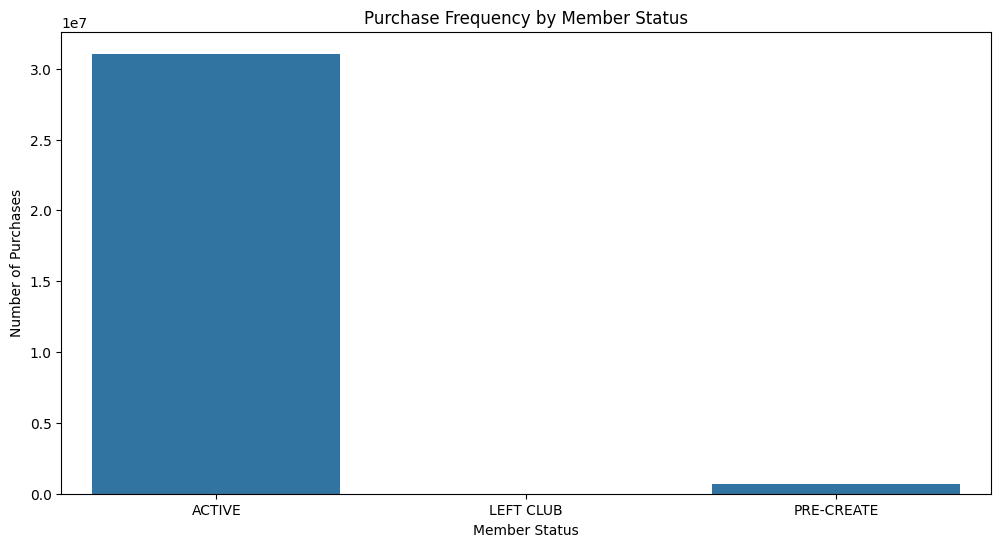

In [ ]:
# 데이터 병합
merged_df = pd.merge(transactions_df, customers_df[['customer_id', 'club_member_status']], on='customer_id')

# 회원 상태별 구매 패턴 분석
# 예: 구매 빈도 및 총액
purchase_pattern = merged_df.groupby('club_member_status').agg({'price': ['count', 'sum']})

# 결과 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=purchase_pattern.index, y=purchase_pattern[('price', 'count')])
plt.title('Purchase Frequency by Member Status')
plt.xlabel('Member Status')
plt.ylabel('Number of Purchases')
plt.show()

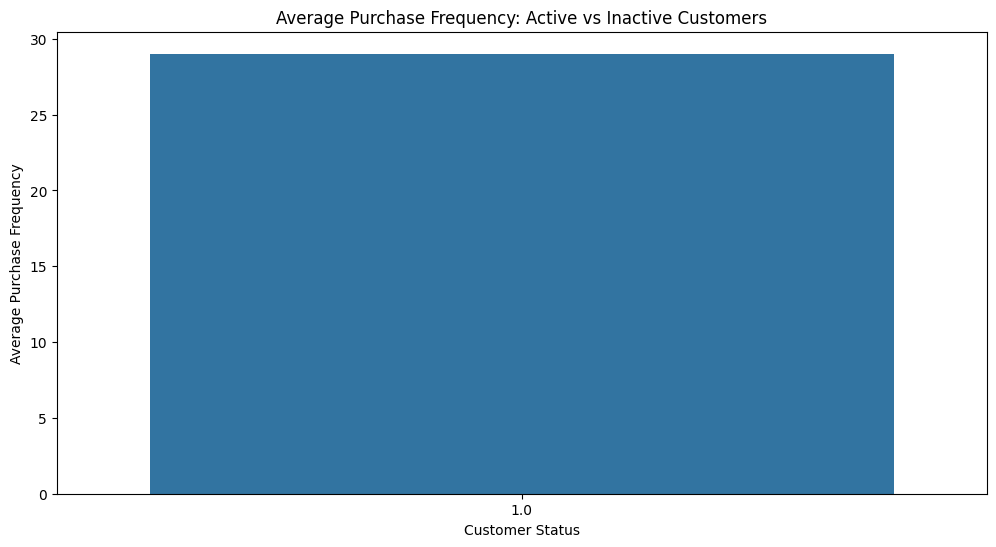

In [ ]:
# 데이터 병합
merged_df = pd.merge(transactions_df, customers_df[['customer_id', 'Active']], on='customer_id')
merged_df = pd.merge(merged_df, articles_df[['article_id', 'product_group_name']], on='article_id')

# 활성화된 유저와 비활성화된 유저의 구매 빈도 분석
purchase_frequency = merged_df.groupby(['Active', 'customer_id']).size().reset_index(name='purchase_count')
purchase_frequency_comparison = purchase_frequency.groupby('Active')['purchase_count'].mean()

# 제품군별 관심도 분석
product_group_interest = merged_df.groupby(['Active', 'product_group_name']).size().reset_index(name='product_count')

# 결과 시각화 - 구매 빈도
plt.figure(figsize=(12, 6))
sns.barplot(x=purchase_frequency_comparison.index, y=purchase_frequency_comparison.values)
plt.title('Average Purchase Frequency: Active vs Inactive Customers')
plt.xlabel('Customer Status')
plt.ylabel('Average Purchase Frequency')
plt.show()

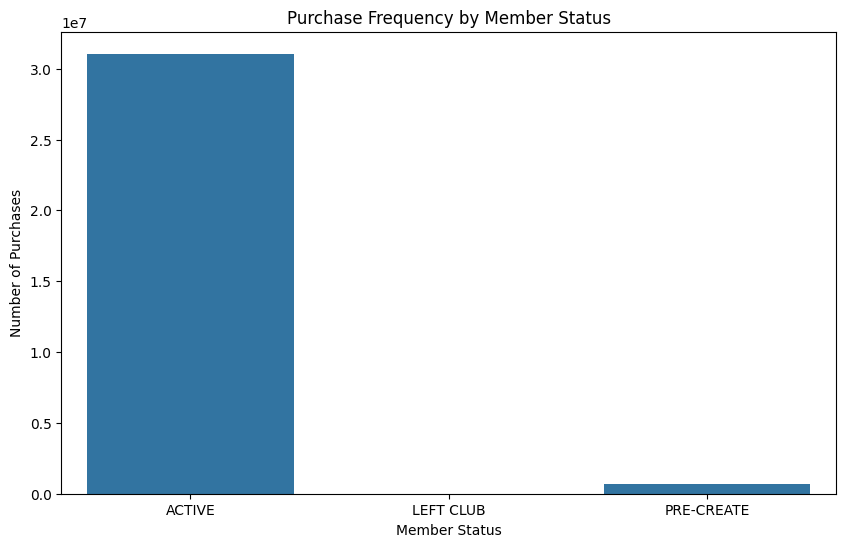

In [ ]:
# 데이터 병합
merged_df = pd.merge(transactions_df, customers_df[['customer_id', 'club_member_status']], on='customer_id')

# 구매 패턴 분석을 위한 데이터 전처리
# 여기서는 'club_member_status'를 기준으로 'New' 및 'Inactive' (또는 유사한 상태) 구분
# 실제 상태 값은 데이터셋에 따라 다를 수 있음

# 신규 및 탈퇴 회원의 구매 빈도 분석
purchase_pattern = merged_df.groupby('club_member_status').agg({'article_id': 'count'}).rename(columns={'article_id': 'purchase_count'})

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=purchase_pattern.index, y=purchase_pattern['purchase_count'])
plt.title('Purchase Frequency by Member Status')
plt.xlabel('Member Status')
plt.ylabel('Number of Purchases')
plt.show()

In [ ]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 2.7 MB/s eta 0:00:00


In [ ]:
import pdfplumber
import requests
from io import BytesIO

# PDF 파일의 URL
url = 'https://hmgroup.com/content/dam/hmgroup/groupsite/documents/masterlanguage/CSR/reports/2018_Sustainability_report/Highlights_HM_group_SustainabilityReport_2018.pdf'

# PDF 파일 다운로드
response = requests.get(url)
f = BytesIO(response.content)

# PDF 파일 열기 및 텍스트 추출
with pdfplumber.open(f) as pdf:
    # 각 페이지의 텍스트 추출
    text = ''
    for page in pdf.pages:
        text += page.extract_text() + "\n"

# 추출된 텍스트 일부 출력
print(text[:2000])  # 처음 2000자만 출력

H&M GROUP SUSTAINABILITY REPORT 2018 1 OF 11
HIGHLIGHTS
Sustainability Report 2018
Highlights
H&M GROUP SUSTAINABILITY REPORT 2018 2 OF 11
HIGHLIGHTS
Executive summary
HIGHLIGHTS
From the beginning, H&M
group’s role has been to democ­
ratise fashion. Today, that
Our vision and
means making it sustainable:
strategy are built on
it’s the only way we’ll keep
three key ambitions
making great fashion and de­
sign available today, tomorrow
and for generations to come.
Our sustainability vision is to
use our size and scale for good,
100% LEADING
and with the help of techno­ THE CHANGE
logy and innovation, lead the
change towards circular and
renewable fashion while being
a fair and equal company. To
achieve this, we have developed
an ambitious strategy with the
100% CIRCULAR 100% FAIR
help of a broad range of exter­
& RENEWABLE & EQUAL
nal and internal experts. Our
strategy follows a science­based
approach, wherever possible.
ARHK&EMT..
H&M GROUP SUSTAINABILITY REPORT 2018 3 OF 11
HIGHLIGHTS


**h&m sustainability initiatives**

https://hmgroup.com/sustainability/

In [ ]:
!pip install requests beautifulsoup4 wordcloud nltk matplotlib

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


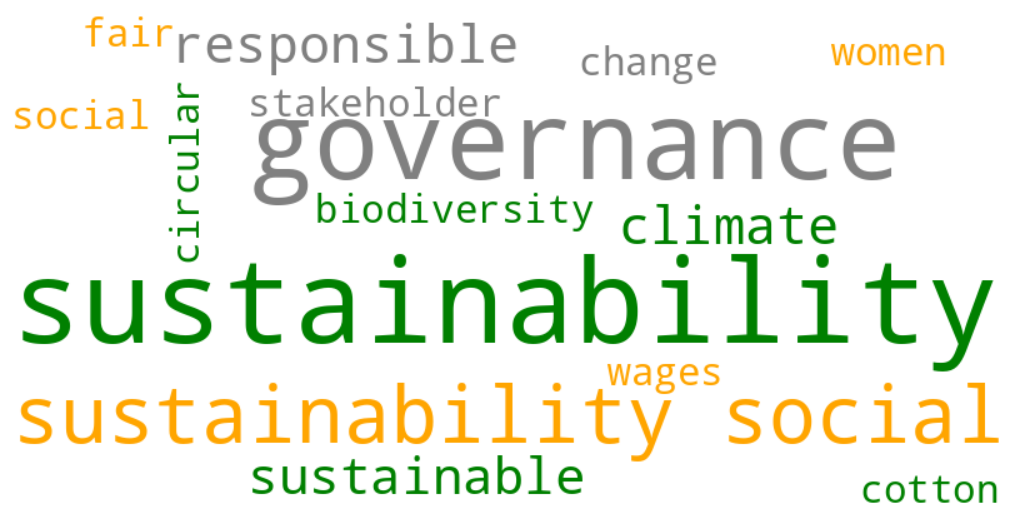

In [ ]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Keywords organized by ESG categories
esg_keywords = {
    "environmental": [
        "climate", "net-zero", "emissions", "innovation","emission", "waste-free", "textile"
        "infrastructure", "circular", "recycling", "closed-loop", "sustainable fashion", "sustainable fashion innovation", "circularity"
        "pre-owned", "biodiversity", "sustainability", "environmental","suppy chains","supply chain", "sustainable", "cotton", "conscious"
    ],
    "social": [
        "empowerment", "workers", "women", "fair", "jobs", "safe", "meaningful", "purchasing practice","wage","job","woman","activists","activist"
        "human rights", "worker", "wages", "social", "purchasing practices", "feminists", "femenist", "donation", "workers", "worker", "LGBTQ"
    ],
    "governance": [
        "responsible","collaboration", "leadership", "stakeholders", "progress",
        "movement", "change", "diverse","governance","bold", "stakeholder"
    ]
}

# Color function to assign colors based on ESG category
def color_func(word, **kwargs):
    for category, words in esg_keywords.items():
        if word in words:
            if category == 'environmental':
                return "green"
            elif category == 'social':
                return "orange"
            elif category == 'governance':
                return "grey"
    return "orange"  # Default color for words not found in the lists

# Base URL and years to fetch articles from
base_url = "https://about.hm.com/content/hmabout/groupsite/en/news.html"
years = ['2018', '2019', '2020']

# Fetch article URLs from the news section
def fetch_article_urls(base_url, years):
    article_urls = []
    for year in years:
        params = {
            'tag': 'hmabout:news-subject/sustainability',
            'year': f'hmabout:year/{year}'
        }
        response = requests.get(base_url, params=params)
        soup = BeautifulSoup(response.text, 'html.parser')
        links = soup.find_all('a', href=True)
        article_urls.extend([link['href'] if 'http://' in link['href'] or 'https://' in link['href'] else 'https://about.hm.com' + link['href'] for link in links if 'news' in link['href']])
    return article_urls

# Extract text from articles and filter by keywords
def extract_text(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    text = ' '.join(soup.stripped_strings)
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if any(word in keywords for keywords in esg_keywords.values())]
    return ' '.join(filtered_tokens)

# Process articles to collect text
article_urls = fetch_article_urls(base_url, years)
all_text = ' '.join(extract_text(url) for url in article_urls)

# Generate and display the word cloud with custom colors
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    color_func=color_func,
    scale=1,  # Adjust scale to increase resolution and fill space
    min_font_size=10,  # Reduce minimum font size to allow smaller words to fill gaps
    max_font_size=100,  # Optionally adjust max font size for better fill
    max_words=200,  # Increase max words to fill more space if needed
    relative_scaling=0.5,  # Adjust scaling between words; affects space filling
    mode='RGBA',  # Use transparent background to reduce whitespace visually
    contour_width=0,  # No border around the words
    contour_color='steelblue'
).generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)  # Reduce padding around the figure
plt.show()

In [ ]:
from collections import Counter

# Initialize counters for each ESG category
environmental_counts = Counter()
social_counts = Counter()
governance_counts = Counter()

# Function to update the counters based on the extracted tokens
def update_counts(tokens):
    for word in tokens:
        if word in esg_keywords['environmental']:
            environmental_counts[word] += 1
        elif word in esg_keywords['social']:
            social_counts[word] += 1
        elif word in esg_keywords['governance']:
            governance_counts[word] += 1

# Process articles to collect text and update counts
for url in article_urls:
    text = extract_text(url)
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if any(word in keywords for keywords in esg_keywords.values())]
    update_counts(filtered_tokens)

# Function to display the counts
def display_counts():
    print("Environmental Keywords:")
    for word, count in environmental_counts.items():
        print(f"{word}: {count}")
    print("\nSocial Keywords:")
    for word, count in social_counts.items():
        print(f"{word}: {count}")
    print("\nGovernance Keywords:")
    for word, count in governance_counts.items():
        print(f"{word}: {count}")

# Display the keyword frequencies
display_counts()


Environmental Keywords:
sustainability: 39
climate: 6
biodiversity: 3
circular: 3
cotton: 3
sustainable: 6

Social Keywords:
social: 21
fair: 3
wages: 3
women: 3

Governance Keywords:
governance: 18
change: 3
responsible: 6
stakeholder: 3


In [ ]:
!pip install matplotlib numpy

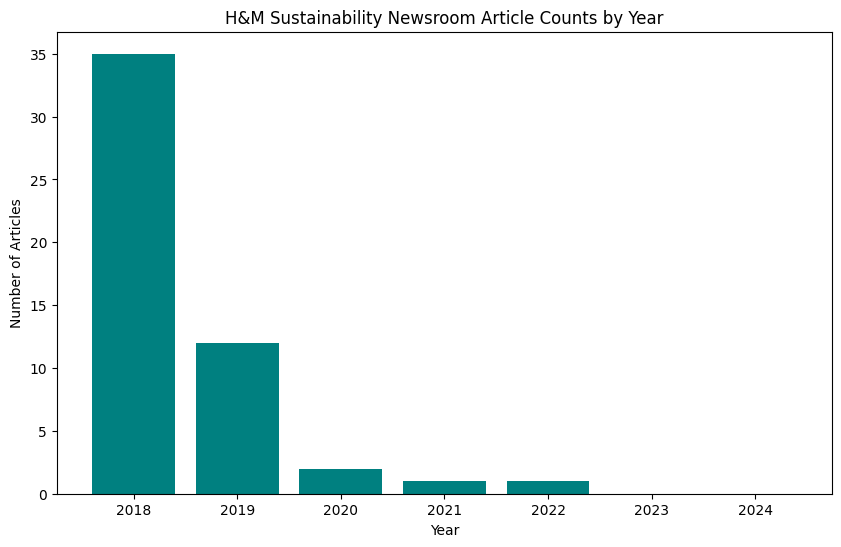

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 설정
years = np.array([2018, 2019, 2020, 2021, 2022, 2023, 2024])  # 연도
article_counts = np.array([35, 12, 2, 1, 1, 0, 0])  # 각 연도의 기사 수

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.bar(years, article_counts, color='teal')  # 막대 그래프를 그림, 색상은 teal

# 그래프 제목 및 라벨
plt.title('H&M Sustainability Newsroom Article Counts by Year')  # 그래프 제목
plt.xlabel('Year')  # x축 라벨
plt.ylabel('Number of Articles')  # y축 라벨

# 축에 보여질 값 설정
plt.xticks(years)  # X축에 표시될 값
plt.yticks(range(0, 36, 5))  # Y축에 표시될 값

# 그래프 표시
# plt.grid(true)  # 격자 보이기
plt.show()


In [ ]:
!pip install tweepy textblob pandas numpy

In [ ]:
import tweepy
from textblob import TextBlob
import pandas as pd

# Twitter API credentials
consumer_key = 'YOUR_CONSUMER_KEY'
consumer_secret = 'YOUR_CONSUMER_SECRET'
access_token = 'YOUR_ACCESS_TOKEN'
access_token_secret = 'YOUR_ACCESS_TOKEN_SECRET'

# Authenticate with the Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

# Function to fetch tweets
def fetch_tweets(query, max_tweets=100):
    tweets = []
    for tweet in tweepy.Cursor(api.search, q=query, lang="en", tweet_mode='extended').items(max_tweets):
        tweets.append(tweet.full_text)
    return tweets

# Function to analyze sentiment of tweets
def analyze_sentiments(tweets):
    sentiments = []
    for tweet in tweets:
        analysis = TextBlob(tweet)
        polarity = analysis.sentiment.polarity
        subjectivity = analysis.sentiment.subjectivity
        sentiments.append((tweet, polarity, subjectivity))
    return sentiments

# Fetch and analyze tweets
tweets = fetch_tweets("sustainability OR ESG", max_tweets=100)
tweet_sentiments = analyze_sentiments(tweets)

# Convert to DataFrame for easier manipulation and visualization
df = pd.DataFrame(tweet_sentiments, columns=['Tweet', 'Polarity', 'Subjectivity'])
print(df.head())

# Save to CSV (optional)
df.to_csv('tweet_sentiments.csv', index=False)